# 7_期望最大算法

不完全数据：观测随机变量$Y$。  
完全数据：观测随机变量$Y$和隐随机变量$Z$。

含有隐变量$Z$的概率模型，目标是极大化观测变量$Y$关于参数$\theta$的对数似然函数，即 $$\max_\theta L\left(\theta\right)$$
其中，\begin{align*} L \left( \theta \right) & = \log P \left( Y | \theta \right) \\ & = \log \sum_{Z} P \left( Y,Z | \theta \right) \\ & = \log \left( \sum_{Z} P \left( Y|Z,\theta \right) P \left( Z| \theta \right) \right)\end{align*} 

对数似然函数$L \left( \theta \right)$与第$i$次迭代后的对数似然函数$L \left( \theta^{\left( i \right)} \right)$的差 \begin{align*}  L \left( \theta \right) - L \left( \theta^{\left( i \right)} \right) & ＝ \log \left( \sum_{Z}  P \left( Y|Z,\theta \right) P \left( Z| \theta \right) \right) - \log P \left( Y| \theta^{ \left( i \right)}  \right) \\ & = \log \left( \sum_{Z} P \left( Z | Y , \theta^{\left( i \right)} \right) \dfrac { P \left( Y|Z,\theta \right) P \left( Z| \theta \right)} {P \left( Z | Y , \theta^{\left( i \right)} \right)} \right) - \log P \left( Y| \theta^{ \left( i \right)}  \right)\\ &\geq \sum_{Z} P \left( Z | Y , \theta^{\left( i \right)} \right) \log \dfrac {P \left( Y | Z, \theta \right) P \left(Z|\theta\right)}{P \left( Z | Y , \theta^{\left( i \right)} \right)} - \log P \left( Y| \theta^{ \left( i \right)} \right) \\ & = \sum_{Z} P \left( Z | Y , \theta^{\left( i \right)} \right) \log \dfrac {P \left( Y | Z, \theta \right) P \left(Z|\theta\right)} {P \left( Z | Y , \theta^{\left( i \right)} \right) P \left(Y|\theta^{\left( i \right)} \right)}\end{align*} 

Jensen不等式：
$$\log\sum_j\lambda_j y_j \geq\sum_j\lambda_j\log y_j$$

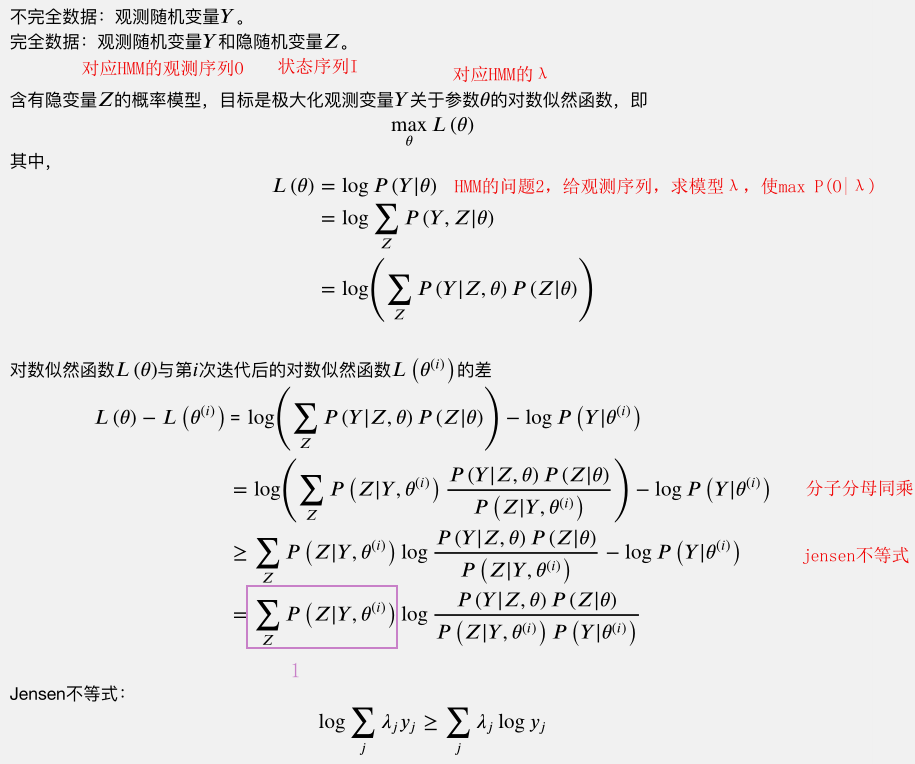

令\begin{align*} \\& B \left( \theta , \theta^{\left ( i \right)} \right) =  L \left( \theta^{\left ( i \right)} \right) + \sum_{Z} P \left( Z | Y , \theta^{\left( i \right)} \right) \log \dfrac {P \left( Y | Z, \theta \right) P \left(Z|\theta\right)} {P \left( Z | Y , \theta^{\left( i \right)} \right) P \left(Y|\theta^{\left( i \right)} \right)} \end{align*}    
则  \begin{align*} & L \left( \theta \right) \geq B \left( \theta, \theta^{\left( i \right)} \right) \end{align*}  
即函数$B \left( \theta, \theta^{\left( i \right)} \right)$ 是$L \left( \theta \right)$ 的一个下界。  
选择$\theta^{\left( i+1 \right)}$使$B \left( \theta, \theta^{\left( i \right)} \right) $达到极大，即 \begin{align*}  \theta^{\left( i+1 \right)}&＝ \mathop{\arg \max}_\theta B \left( \theta, \theta^{\left( i \right)} \right)  \\ & = \mathop{\arg \max}_\theta \left( L \left( \theta^{\left ( i \right)} \right) + \sum_{Z} P \left( Z | Y , \theta^{\left( i \right)} \right) \log \dfrac {P \left( Y | Z, \theta \right) P \left(Z|\theta\right)} {P \left( Z | Y , \theta^{\left( i \right)} \right) P \left(Y|\theta^{\left( i \right)} \right)} \right) \\ & = \mathop{\arg \max}_\theta \left( \sum_{Z} P \left( Z | Y, \theta^{\left( i \right)} \right)  \log \left( P \left( Y | Z, \theta \right)  \right) P \left( Z | \theta \right) \right)  \\ & = \mathop{\arg \max}_\theta \left( \sum_{Z} P \left( Z | Y, \theta^{\left( i \right)} \right)  \log P \left(  Y, Z | \theta\right)  \right) \end{align*}

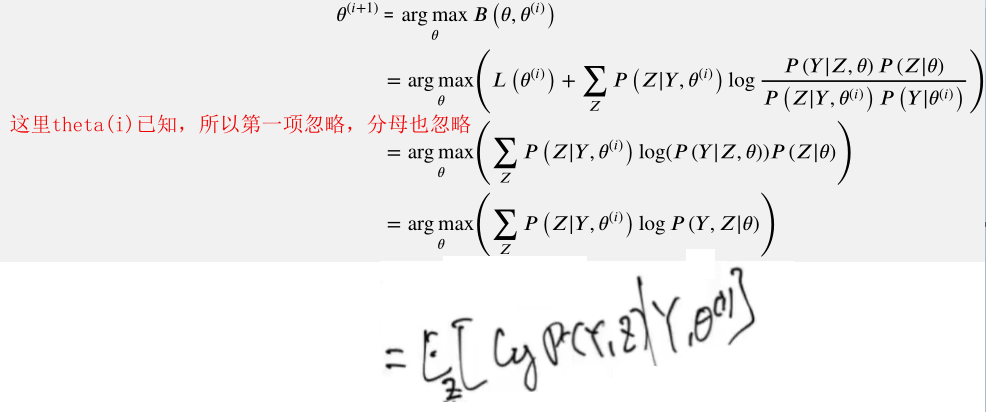

EM算法：  
输入：观测随机变量数据$Y$，隐随机变量数据$Z$，联合分布$P\left(Y,Z|\theta\right) $，条件分布$P\left(Z｜Y，\theta\right) $；  
输出：模型参数$\theta$  
1. 初值$\theta^{\left(0\right)}$   
2. $E$步：\begin{align*} & Q\left(\theta,\theta^\left(i\right)\right)=E_{Z}\left[\log P\left(Y,Z|\theta\right)|Y,\theta^{\left(i\right)}\right] \\ & = \sum_{Z} \log P\left(Y,Z|\theta \right) \cdot P\left(Z|Y, \theta^\left(i\right)\right)\end{align*}  
3. $M$步：\begin{align*} & \theta^{\left( i+1 \right)} = \mathop{\arg \max}_\theta Q\left(\theta, \theta^\left( i \right) \right)\end{align*}  
4. 重复2. 3.，直到收敛。

$Q$函数：完全数据的对数似然函数$\log P \left( Y , Z | \theta \right)$关于在给定观测数据$Y$和当前参数$\theta_{\left( i \right)}$下对未观测数据$Z$的条件概率分布$P \left( Z | Y, \theta_{\left( i \right)} \right)$的期望  
\begin{align*} & Q \left( \theta, \theta_{\left( i \right)} \right) = E_{Z} \left[ \log P \left( Y, Z | \theta \right)  | Y , \theta_{\left( i \right)}  \right] \end{align*} 